<a href="https://colab.research.google.com/github/DmitryBal/NumMethods2/blob/main/Copy_of_alex_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, uniform, hypergeom, expon, laplace
from scipy.special import erf
import matplotlib.pyplot as plt
import math 
import statistics 

np.set_printoptions(precision=5)

In [ ]:
def print(*args):
    __builtins__.print(*("%.5f" % a if isinstance(a, float) else a
                         for a in args))

In [ ]:
def nws(l, arr):
  n_i = [0]*(l+1)
  w_i = [0]*(l+1)
  s_i = [0]*(l+1)
  for i in range(l+1):
      veil = sum(map(lambda item: item == i, arr))
      n_i[i] = veil
      w_i[i] = veil / 200
      s_i[i] = np.round(sum(w_i),5)
  print('n = ', n_i)
  print('w = ', w_i)    
  print('s = ', s_i) 
  return w_i, s_i
  

In [ ]:
name = 'dima'
b = None
geom = None
po = None

exp = None
norm = None
uni = None

u = None
h = None
V = 0
a_uni = None

if name == 'dima':
  b = np.load('dima_binom.npy')
  geom = np.load('dima_geom.npy')
  po = np.load('dima_poisson.npy')
  u = np.load('dima_uniform.npy')
  h = np.load('dima_hyper.npy')
  norm = np.load('dima_norm.npy')
  exp = np.load('dima_exp.npy')
  uni = np.load('dima_uni.npy')
  V = 40
elif name == 'alex':
  b = np.load('alex_binom.npy')
  geom = np.load('alex_geom.npy')
  po = np.load('alex_poisson.npy')
  u = np.load('alex_uniform.npy')
  h = np.load('alex_hyper.npy')
  norm = np.load('alex_norm.npy')
  exp = np.load('alex_exp.npy')
  uni = np.load('alex_uni.npy')
  V = 58
else:
  # name = input()
  # V = int(input())
  name = 'alex'
  V = 58
  n1 = 5 + V%19 
  p = 0.2 + 0.005*V
  q = 1 - p
  lamda = 0.5 + 0.01*V
  n4 = 5 + V%28
  m = 5 + V%7
  M = 2*m + 3
  K = m + 1 + V%2
  b = np.random.binomial(n1, p, size=200)
  np.save(f"{name}_binom.npy", b)
  geom = np.random.geometric(p, size=200)
  geom-=1
  np.save(f"{name}_geom.npy", geom)
  po = np.random.poisson(lamda, size=200)
  np.save(f'{name}_poisson.npy', po)
  u = np.random.random_integers(0,n4-1,200)
  np.save(f'{name}_uniform.npy', u)
  h = hypergeom.rvs(M, K, m, size=200)
  np.save(f'{name}_hyper.npy', h)

  a_norm = (-1)**V * 0.05*V
  sgm_norm = 0.005*V+1
  norm = np.random.normal(loc=a_norm, scale=sgm_norm, size=200)
  np.save(f'{name}_norm.npy', norm)
  lmbd = 2+(-1)**V * 0.001*V
  exp = expon.rvs(size=200, scale=1/(lmbd))
  np.save(f'{name}_exp.npy', exp)
  a_uni = (-1.0)**V*0.002*V
  uni = uniform.rvs(size=200, loc=a_uni, scale=6)
  np.save(f'{name}_uni.npy', uni)

In [ ]:
  n1 = 5 + V%19 
  p = 0.2 + 0.005*V
  q = 1 - p
  lamda = 0.5 + 0.01*V
  n4 = 5 + V%28
  m = 5 + V%7
  M = 2*m + 3
  K = m + 1 + V%2
  print(n1,p,lamda,n4,m,M,K)

  a_norm = (-1)**V * 0.05*V
  sgm_norm = 0.005*V+1
  lmbd = 2+(-1)**V * 0.001*V
  a_uni = (-1.0)**V*0.002*V

  print(a_norm, sgm_norm)
  print(lmbd)
  print(a_uni, a_uni+6)

7 0.40000 0.90000 17 10 23 11
2.00000 1.20000
2.04000
0.08000 6.08000


In [ ]:
def find_part(dist):
  d = np.var(dist)
  return np.mean(dist), d, np.sqrt(d)

In [ ]:
# Найдет необходимые характеристики для заданной выборки
def find(dist):
  x , d, sigma = find_part(dist)
  mode = statistics.mode(dist) #Мода
  median = statistics.median(dist) #Медиана
  asymmetry = skew(dist) #Коэффициент асимметрии
  excess = kurtosis(dist) #Коэффициент эксцесса
  return np.array([x, d,sigma,mode,median,asymmetry,excess])

In [ ]:
def find_binom(n,p,q):
  x = n*p #Математическое ожидание 
  d = n*p*q #Дисперсия
  sigma = np.sqrt(d) #Cреднее квадратическое отклонение
  mode = (n+1)*p # Мода
  if mode.is_integer():
    mode-=0.5
  median = round(n*p) #Медиана
  asymmetry = (q-p)/sigma #Коэффициент асимметрии
  excess = (1 - 6*p*q)/d #Коэффициент эксцесса
  return np.array([x, d,sigma,mode,median,asymmetry,excess])

In [ ]:
def find_geom(p,q):
  x = q / p #Математическое ожидание 
  d = q / np.power(p,2)
  sigma = np.sqrt(d) #Cреднее квадратическое отклонение
  median = -math.log(2,q)  #Мода
  if median.is_integer():
    median-=0.5
  asymmetry = (2-p)/np.sqrt(q) #Коэффициент асимметрии
  excess = 6 + 1/d #Коэффициент эксцесса
  return np.array([x, d,sigma,0,median,asymmetry,excess]) 

In [ ]:
def find_poisson(lamda):
  excess = 1 / lamda #Коэффициент асимметрии
  sigma = np.sqrt(lamda)
  median = lamda + 1/3 + 0.02*excess #Медиана
  asymmetry = 1 / sigma
  return np.round(np.array([lamda, lamda,sigma,int(lamda),median,asymmetry,excess]), 5) 

In [ ]:
def find_uniform(n):
  x = (n-1)/2
  n_2 = np.power(n,2) - 1
  d = n_2 / 12
  sigma = np.sqrt(d)
  excess = - (6/5)*(n_2+2)/n_2
  return np.round(np.array([x, d,sigma,x,x,0,excess]), 5) 

In [ ]:
def find_hypergeom(p_k,m,M,K,M_K):
  x = m*K/M
  M_m = M-m
  M_1 = M-1
  M_2 = M_1 - 1
  M_2K = M - 2*K
  M_2m = M - 2*m
  M2 = np.power(M,2)
  d = (x*M_K*M_m)/(M_1*M)
  sigma = np.sqrt(d)
  mode = int(((K+1)*(m+1))/(M+2))
  median = 0
  for i in range(m):
    median+=p_k[i]
    if median > 0.5:
      median = i
      break
    if median == 0.5:
      median = i + 0.5
      break
  asymmetry = np.sqrt(M_1/(m*K*M_K*M_m))*M_2K*M_2m /M_2
  excess = M_1*M2*(M_2K*M_2m/(K*M_K) + 3*m*(M+6)*M_m/M2 - 6) / (m*M_2*(M_2-1)*M_m)
  return np.array([x, d,sigma,mode,median,asymmetry,excess])

In [ ]:
"""
Принимает на вход 2 массива одинаковой длинны
Возвращает массив отношений элементов, где все элементы взяты по модулю
"""
def comparison(arr_1,arr_2):
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)

In [ ]:
"""
Принимает на вход 2 массива одинаковой длиннв
Возвращает разность массивов, все элементы взяты по модулю
"""
def division(arr_1,arr_2):
   return np.round([np.absolute(i - j) for i, j in zip( arr_1, arr_2)],5)

In [ ]:
# График эмпиричекой функции
def emp_func(l,arr):
  plt.figure(figsize=(10,6))
  for i in range(l):  
    x = [i,i+1]
    s = arr[i]
    y = [s,s]
    plt.plot(x,y,color = 'blue')
  plt.yticks(np.arange(0,1.05, 0.05))
  plt.xticks(np.arange(0,l,1))
  plt.grid()
  plt.show()

In [ ]:
# График полигон
def polygon(arr_1, arr_2,l):
  mx = max(max(arr_1), max(arr_2))
  plt.figure(figsize=(10,5))
  plt.plot(arr_1,color = 'blue', label='Практические значения')
  plt.plot(arr_2,color = "red", label='Теоретические значения')
  plt.legend()
  plt.ylabel("Относительная частота появления события.")
  plt.xticks(np.arange(0,l,1))
  plt.yticks(np.arange(0,mx+0.05, 0.05))
  plt.grid()
  plt.show()

# Задание 1

In [ ]:
b

array([2, 2, 3, 1, 2, 5, 4, 3, 2, 4, 0, 2, 4, 3, 3, 2, 1, 3, 2, 4, 4, 2,
       4, 2, 1, 5, 3, 3, 3, 3, 2, 4, 5, 3, 4, 3, 3, 3, 3, 2, 2, 4, 3, 2,
       3, 4, 4, 3, 4, 4, 1, 2, 3, 2, 3, 3, 3, 2, 1, 4, 4, 2, 3, 4, 3, 5,
       3, 2, 2, 5, 3, 3, 3, 2, 4, 3, 3, 4, 3, 2, 2, 2, 1, 5, 1, 1, 3, 2,
       4, 5, 5, 2, 1, 3, 3, 2, 3, 4, 3, 4, 1, 7, 1, 4, 2, 3, 2, 5, 5, 3,
       3, 3, 4, 3, 4, 2, 3, 4, 6, 2, 2, 3, 3, 5, 3, 3, 1, 2, 1, 4, 3, 1,
       2, 3, 3, 4, 3, 2, 4, 2, 4, 2, 2, 0, 3, 1, 1, 4, 2, 4, 4, 2, 4, 0,
       4, 2, 5, 4, 3, 3, 3, 3, 3, 1, 0, 4, 1, 3, 1, 0, 3, 3, 1, 3, 4, 1,
       2, 1, 4, 1, 1, 4, 2, 2, 3, 1, 0, 3, 4, 3, 2, 3, 6, 2, 3, 3, 2, 3,
       2, 2])

In [ ]:
b.sort()
b

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 7])

Статистический Ряд

In [ ]:
w_1, s_1 = nws(n1,b)

n =  [6, 25, 48, 66, 40, 12, 2, 1]
w =  [0.03, 0.125, 0.24, 0.33, 0.2, 0.06, 0.01, 0.005]
s =  [0.03, 0.155, 0.395, 0.725, 0.925, 0.985, 0.995, 1.0]


Вероятности

In [ ]:
p_k1 = [0]*(n1+1)
for i in range(n1+1):
  p_k1[i] = round(math.comb(n1, i)*np.power(p, i)*np.power(q,n1-i),5)
print('p_k = ', p_k1) 

p_k =  [0.02799, 0.13064, 0.26127, 0.2903, 0.19354, 0.07741, 0.0172, 0.00164]


Полигон относительных частот

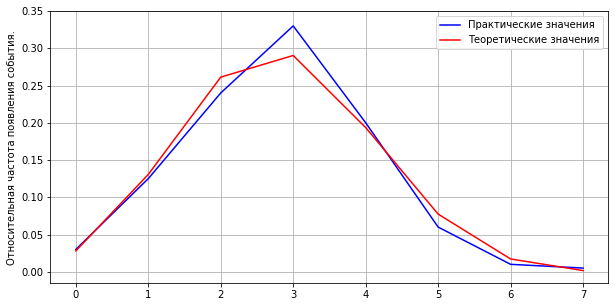

In [ ]:
polygon(w_1,p_k1,n1+1)

Эмпирическая функция

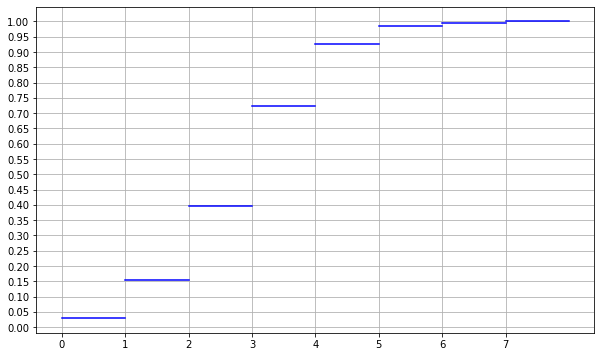

In [ ]:
emp_func(n1+1,s_1)

In [ ]:
practic = find(b)
practic

array([2.79   , 1.5759 , 1.25535, 3.     , 3.     , 0.11226, 0.09553])

In [ ]:
theory = find_binom(n1,p,q)
theory

array([ 2.8    ,  1.68   ,  1.29615,  3.2    ,  3.     ,  0.1543 ,
       -0.2619 ])

In [ ]:
abs = division(theory,practic)
abs

array([0.01   , 0.1041 , 0.0408 , 0.2    , 0.     , 0.04205, 0.35743])

In [ ]:
rel = comparison(abs,theory)
rel

array([0.00357, 0.06196, 0.03148, 0.0625 , 0.     , 0.27252, 1.36473])

Cравнения относительных частот и теоретических вероятностей

In [ ]:
w_p = division(w_1,p_k1)
w_p

array([0.00201, 0.00564, 0.02127, 0.0397 , 0.00646, 0.01741, 0.0072 ,
       0.00336])

#Задание 2

In [ ]:
geom

array([ 0,  1,  1,  0,  3,  1,  2,  1,  0,  0,  0,  1,  0,  1,  1,  2,  4,
        0,  7,  1,  0,  0,  0,  3,  3,  0,  0,  0,  0,  3,  4,  1,  2,  1,
        0,  0,  0,  6,  0,  4,  3,  0,  1,  0,  0,  1,  2,  1,  1,  1,  1,
        0,  0,  1,  1,  0,  1,  4,  0,  2,  2,  1,  0,  3,  3,  1,  6,  0,
        5,  0,  0,  0,  4,  1,  1,  2,  1,  2,  0,  2,  0,  1,  0,  2,  1,
        0,  1,  3,  0,  0,  0,  7,  0,  3,  0,  0,  2,  1, 11,  2,  0,  0,
        0,  0,  4,  0,  0,  1,  5,  2,  0,  3,  1,  0,  0,  0,  0,  1,  0,
        2,  1,  0,  0,  3,  2,  1,  4,  2,  4,  4,  0,  0,  5,  0,  2,  0,
        3,  5,  0,  2,  2,  1,  0,  0,  3,  1,  3,  0,  4,  0,  0,  1,  0,
        1,  0,  0,  2,  0,  4,  1,  0,  1,  0,  0,  0,  3,  2,  0,  0,  1,
        2,  4,  3,  2,  0,  5,  0,  9,  1,  3,  2,  0,  3,  0,  0,  5,  1,
        1,  1,  1,  2,  7,  0,  7,  6,  6,  2,  0,  1,  1])

In [ ]:
geom.sort()
geom

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  9, 11])

In [ ]:
_len2 = max(geom)

In [ ]:
w_2, s_2 = nws(_len2,geom)

n =  [81, 47, 26, 18, 12, 6, 4, 4, 0, 1, 0, 1]
w =  [0.405, 0.235, 0.13, 0.09, 0.06, 0.03, 0.02, 0.02, 0.0, 0.005, 0.0, 0.005]
s =  [0.405, 0.64, 0.77, 0.86, 0.92, 0.95, 0.97, 0.99, 0.99, 0.995, 0.995, 1.0]


In [ ]:
p_k2 = [0]*(_len2+1)
for i in range(_len2+1):
  p_k2[i] = round(p*np.power(q,i),5)
print('p_k = ', p_k2) 

p_k =  [0.4, 0.24, 0.144, 0.0864, 0.05184, 0.0311, 0.01866, 0.0112, 0.00672, 0.00403, 0.00242, 0.00145]


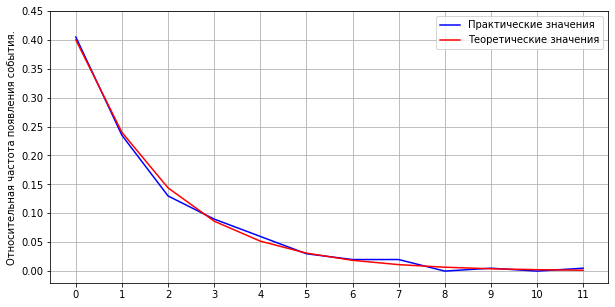

In [ ]:
polygon(w_2,p_k2,_len2+1)

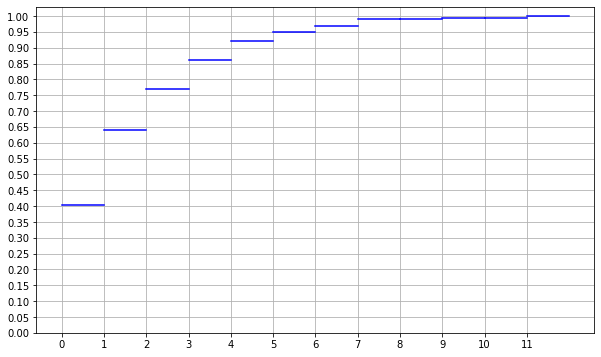

In [ ]:
emp_func(_len2+1,s_2)

In [ ]:
practic = find(geom)
practic

array([1.515  , 3.68977, 1.92088, 0.     , 1.     , 1.76755, 3.73299])

In [ ]:
theory = find_geom(p,q)
theory

array([1.5    , 3.75   , 1.93649, 0.     , 1.35692, 2.06559, 6.26667])

In [ ]:
abs = division(theory,practic)
abs

array([0.015  , 0.06022, 0.01561, 0.     , 0.35692, 0.29804, 2.53368])

In [ ]:
rel = comparison(abs,theory)
rel

<ipython-input-13-3eee365a1ee5>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)


array([0.01   , 0.01606, 0.00806,     nan, 0.26304, 0.14429, 0.40431])

In [ ]:
w_p = division(w_2,p_k2)
w_p

array([0.005  , 0.005  , 0.014  , 0.0036 , 0.00816, 0.0011 , 0.00134,
       0.0088 , 0.00672, 0.00097, 0.00242, 0.00355])

#Задание 3

In [ ]:
po

array([5, 2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 3, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 3, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0,
       1, 1, 0, 3, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 3,
       1, 1])

In [ ]:
po.sort()
po

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 5])

In [ ]:
_len3 = max(po)

In [ ]:
w_3, s_3 = nws(_len3,po)

n =  [84, 72, 37, 6, 0, 1]
w =  [0.42, 0.36, 0.185, 0.03, 0.0, 0.005]
s =  [0.42, 0.78, 0.965, 0.995, 0.995, 1.0]


In [ ]:
p_k3 = [0]*(_len3+1)
fact = 1
e_lamda = np.exp(-lamda)
for i in range(_len3+1):
  if i!=0:
    fact*=i
  p_k3[i] = np.round((np.power(lamda,i)*e_lamda)/fact,5)
print('p_k = ', p_k3) 

p_k =  [0.40657, 0.36591, 0.16466, 0.0494, 0.01111, 0.002]


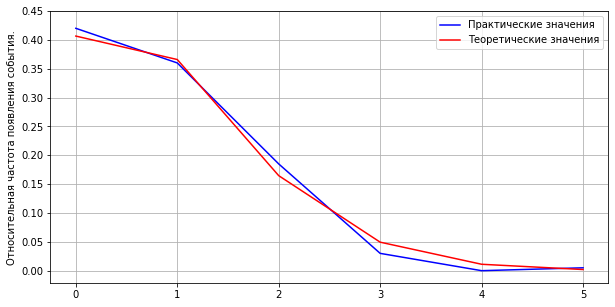

In [ ]:
polygon(w_3,p_k3,_len3+1)

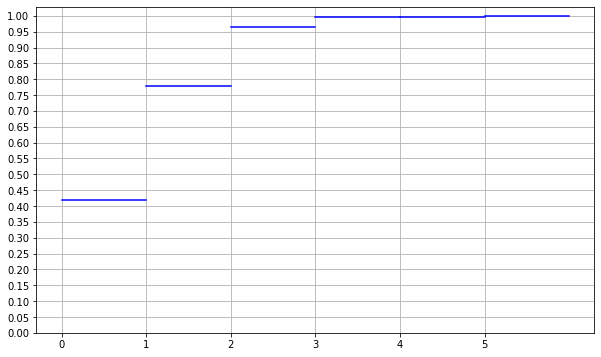

In [ ]:
emp_func(_len3+1,s_3)

In [ ]:
practic = find(po)
practic

array([0.845  , 0.78097, 0.88373, 0.     , 1.     , 1.00247, 1.39533])

In [ ]:
theory = find_poisson(lamda)
theory

array([0.9    , 0.9    , 0.94868, 0.     , 1.25556, 1.05409, 1.11111])

In [ ]:
abs = division(theory,practic)
abs

array([0.055  , 0.11903, 0.06495, 0.     , 0.25556, 0.05162, 0.28422])

In [ ]:
rel = comparison(abs,theory)
rel

<ipython-input-13-3eee365a1ee5>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)


array([0.06111, 0.13226, 0.06846,     nan, 0.20354, 0.04897, 0.2558 ])

In [ ]:
w_p = division(w_3,p_k3)
w_p

array([0.01343, 0.00591, 0.02034, 0.0194 , 0.01111, 0.003  ])

#Задание 4

In [ ]:
u

array([ 5,  7,  0, 11,  1,  9, 15, 14,  4, 16, 13,  3, 12,  2, 16, 14,  5,
       15,  7, 13,  7, 16,  3,  0, 13, 15,  0,  8,  7, 14, 15,  5, 14,  3,
       14, 11, 12,  9,  9, 16, 12,  1,  6,  8, 10, 16, 13,  2, 15,  9,  5,
        2,  9, 16,  2,  6, 16, 16,  6, 14, 13, 11, 16, 12, 13, 11, 16, 13,
       16, 16,  8,  4,  6,  2,  3, 15, 14, 10, 10,  2,  2,  6, 15,  2,  8,
        6, 16,  7, 11, 13,  1,  4,  0,  6, 10, 15,  3,  0,  6,  0,  9, 12,
       12,  8, 16,  7, 15,  1,  0,  4,  4,  5, 16, 13,  1,  3,  8,  3,  9,
       11, 11, 15,  7,  8, 14,  8,  0, 16,  8,  8,  6,  1, 10,  0,  2,  4,
       11,  9,  3,  2,  4,  9,  3,  8, 12,  1, 11,  4, 10,  4,  3,  0,  2,
       14,  2,  7,  6, 10, 15,  3, 11,  8, 13, 16,  0,  7, 16,  8,  3, 11,
        2, 13,  5,  3,  2,  1,  2,  8,  9, 16,  0,  3, 16, 16, 16,  9,  7,
        3,  9,  3,  8, 13, 13,  9,  6,  7, 12, 15,  7,  8])

In [ ]:
u.sort()
u

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])

In [ ]:
w_4, s_4 = nws(n4-1,u)

n =  [12, 8, 15, 16, 9, 6, 11, 12, 16, 13, 7, 11, 8, 13, 9, 12, 22]
w =  [0.06, 0.04, 0.075, 0.08, 0.045, 0.03, 0.055, 0.06, 0.08, 0.065, 0.035, 0.055, 0.04, 0.065, 0.045, 0.06, 0.11]
s =  [0.06, 0.1, 0.175, 0.255, 0.3, 0.33, 0.385, 0.445, 0.525, 0.59, 0.625, 0.68, 0.72, 0.785, 0.83, 0.89, 1.0]


In [ ]:
p_k4 = [1 / n4]*n4
print(p_k4[0])

0.05882


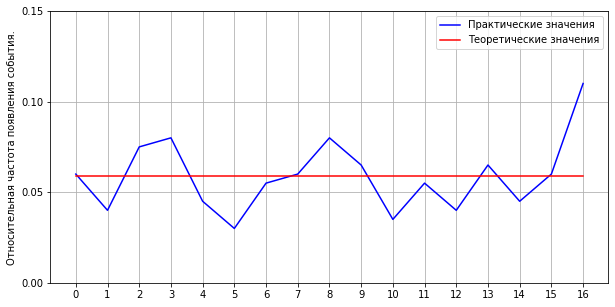

In [ ]:
polygon(w_4,p_k4,n4)

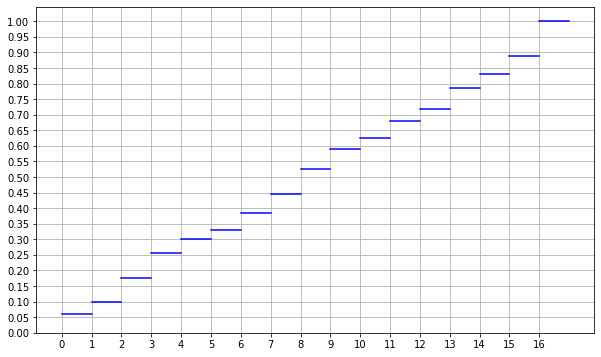

In [ ]:
emp_func(n4,s_4)

In [ ]:
practic = find(u)
practic

array([ 8.30500e+00,  2.62420e+01,  5.12269e+00,  1.60000e+01,
        8.00000e+00,  1.97293e-03, -1.26064e+00])

In [ ]:
theory = find_uniform(n4)
theory

array([ 8.     , 24.     ,  4.89898,  8.     ,  8.     ,  0.     ,
       -1.20833])

In [ ]:
abs = division(practic,theory)
abs

array([3.05000e-01, 2.24198e+00, 2.23710e-01, 8.00000e+00, 0.00000e+00,
       1.97000e-03, 5.23100e-02])

In [ ]:
rel = comparison(abs,theory)
rel

<ipython-input-13-3eee365a1ee5>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)


array([0.03812, 0.09342, 0.04566, 1.     , 0.     ,     inf, 0.04329])

In [ ]:
w_p = division(w_4,p_k4)
w_p

array([0.00118, 0.01882, 0.01618, 0.02118, 0.01382, 0.02882, 0.00382,
       0.00118, 0.02118, 0.00618, 0.02382, 0.00382, 0.01882, 0.00618,
       0.01382, 0.00118, 0.05118])

#Задание 5

In [ ]:
h

array([4, 6, 5, 7, 7, 3, 7, 4, 2, 6, 3, 5, 8, 4, 5, 6, 7, 4, 5, 7, 4, 4,
       6, 5, 4, 4, 3, 5, 5, 3, 4, 7, 1, 6, 5, 5, 6, 7, 3, 5, 5, 4, 4, 4,
       6, 4, 4, 6, 5, 3, 5, 3, 4, 4, 7, 5, 6, 6, 4, 4, 6, 5, 3, 4, 4, 3,
       4, 6, 5, 4, 6, 4, 2, 7, 3, 5, 3, 6, 6, 4, 3, 5, 5, 4, 6, 3, 3, 6,
       7, 7, 5, 8, 5, 5, 5, 1, 5, 4, 4, 6, 7, 4, 6, 6, 2, 4, 3, 5, 6, 4,
       5, 5, 3, 4, 4, 6, 4, 2, 4, 6, 4, 5, 6, 4, 6, 5, 4, 4, 5, 4, 5, 5,
       6, 2, 4, 5, 6, 5, 5, 5, 4, 6, 4, 5, 4, 7, 4, 3, 6, 6, 4, 4, 5, 6,
       5, 4, 4, 8, 4, 5, 4, 5, 5, 4, 5, 4, 4, 5, 5, 6, 4, 2, 4, 5, 5, 7,
       5, 5, 4, 6, 3, 4, 6, 4, 5, 6, 6, 5, 6, 4, 5, 5, 4, 8, 3, 5, 5, 6,
       6, 6])

In [ ]:
h.sort()
h

array([1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8])

In [ ]:
w_5, s_5 = nws(m,h)

n =  [0, 2, 6, 19, 60, 55, 40, 14, 4, 0, 0]
w =  [0.0, 0.01, 0.03, 0.095, 0.3, 0.275, 0.2, 0.07, 0.02, 0.0, 0.0]
s =  [0.0, 0.01, 0.04, 0.135, 0.435, 0.71, 0.91, 0.98, 1.0, 1.0, 1.0]


In [ ]:
p_k5 = [0]*(m+1)
det = math.comb(M, m)
M_K = M - K
for i in range(m+1):
  p_k5[i] = np.round((math.comb(K, i)*math.comb(M_K,m-i))/det,5)
print('p_k = ', p_k5) 

p_k =  [6e-05, 0.00212, 0.0238, 0.11422, 0.26652, 0.31983, 0.19989, 0.06346, 0.00952, 0.00058, 1e-05]


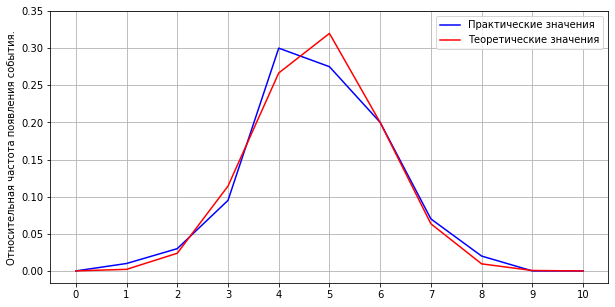

In [ ]:
polygon(w_5,p_k5,m+1)

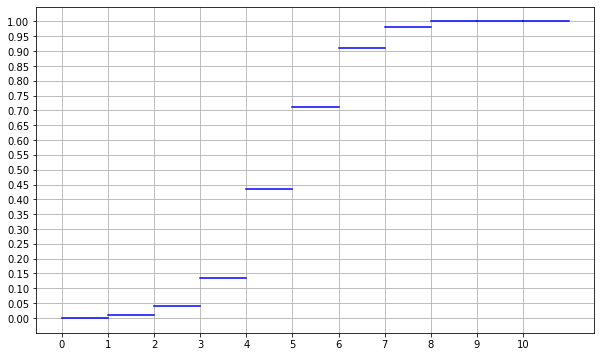

In [ ]:
emp_func(m+1,s_5)

In [ ]:
practic = find(h)
practic

array([ 4.78   ,  1.7216 ,  1.3121 ,  4.     ,  5.     , -0.02793,
        0.10137])

In [ ]:
theory = find_hypergeom(p_k5,m,M,K,M_K)
theory

array([4.78261, 1.47448, 1.21428, 5.     , 5.     , 0.00512, 3.28309])

In [ ]:
abs = division(theory,practic)
abs

array([2.61000e-03, 2.47120e-01, 9.78200e-02, 1.00000e+00, 0.00000e+00,
       3.30500e-02, 3.18171e+00])

In [ ]:
rel = comparison(abs,theory)
rel

array([5.50000e-04, 1.67600e-01, 8.05600e-02, 2.00000e-01, 0.00000e+00,
       6.46125e+00, 9.69120e-01])

In [ ]:
w_p = division(w_5,p_k5)
w_p

array([6.000e-05, 7.880e-03, 6.200e-03, 1.922e-02, 3.348e-02, 4.483e-02,
       1.100e-04, 6.540e-03, 1.048e-02, 5.800e-04, 1.000e-05])

#Непрерывные 

In [ ]:
# Интервальный ряд
def detIntervals(arr, a0, am):
  #  формула Стерджеса
  N = 1+int(np.log2(200))
  intervals = []
  # a0 = arr[0]
  # am = arr[-1]
  ak = (am-a0)/N
  last = a0
  for k in range(N):
    bk = last + ak
    intervals.append([last, bk])
    last = bk
  return intervals

In [ ]:
# Число попаданий значений в i-ый интервал и относительная частота попаданий
def detCountIntervals(arr, intervals):
  ni = []
  interval = intervals[0]    
  ni.insert(0, 
      len(list(filter(lambda x: interval[0]-1 < x <= interval[1], arr)))
  )
  for i in range(1, len(intervals)-1):
    interval = intervals[i]
    ni.append(len(list(filter(lambda x: interval[0] < x <= interval[1], arr))))
  interval = intervals[-1]   
  ni.append(len(list(filter(lambda x: interval[0] < x < interval[1]+1, arr))))
  wi = list(map(lambda x: x/200, ni))
  return ni, wi

In [ ]:
# Ассоциативный ряд
def associativeSeries(intervals):
  arr = []
  for interval in intervals:
    arr.append((interval[0]+interval[1])/2)
  return arr

In [ ]:
# Эмпирическая функция распределения
# x должен быть изначально отсортирован!
def ECDF(x):
    n = len(x)
    def _ecdf(v):
        # side='right' -> Pr(x <= v)
        return (np.searchsorted(x, v, side='right') + 1) / n
    return _ecdf

In [ ]:
# Выборочный момент k-го порядка
def selectedMoment(w, associative, k):
  res = 0
  for i in range(len(associative)):
    res += associative[i]**k * w[i]
  return res

In [ ]:
# Выборочный центральный момент k-ого порядка
def selectedCentralMoment(w, associative, k):
  u1 = selectedMoment(w, associative, 1)
  res = 0
  for i in range(len(associative)):
    res += (associative[i] - u1)**k * w[i]
  return res

In [ ]:
def histogram(intervals,dist,m):
  plt.figure(figsize=(10,5))
  plt.title("Гистограмма относительных частот")
  h_ = intervals[0][1] - intervals[0][0]
  n_bins = [intervals[i][0] for i in range(m)]
  n_bins.append(intervals[-1][1])
  plt.hist(dist, edgecolor='black', bins = n_bins, weights = (np.ones_like(dist)/len(dist))/h_)
  plt.show()

In [ ]:
def interf(x, a, sigma):
  return 1/2 * (erf((x-a)/(sigma*np.sqrt(2))))

In [ ]:
# Ф расп норм
def PHI(intervals, a, sigma):
  arr = []
  for interval in intervals:
    arr.append(interf(interval[1], a, sigma)-interf(interval[0], a, sigma))
  return arr

In [ ]:
def Fexp(intervals, lmbd):
  arr = []
  for interval in intervals:
    arr.append(np.exp(-lmbd*interval[0])-np.exp(-lmbd*interval[1]))
  return arr
  

In [ ]:
def Funi(intervals, det):
  arr = []
  for interval in intervals:
    arr.append((interval[1]-interval[0])/det)
  return arr

In [ ]:
def find_norm(a,sigma):
  return np.array([a, sigma**2, sigma, a, a, 0, 0])

In [ ]:
def find_exp(lamda):
  lamda_1 = 1/ lamda
  return np.array([lamda_1, lamda_1**2, lamda_1, 0, lamda_1*np.log10(2), 2, 6])

In [ ]:
def find_uni(a, b):
  _x = 0.5*(a + b)
  _d = (b-a)**2 / 12
  return np.array([_x, _d, np.sqrt(_d), _x, _x, 0, -1.2])

## Выборочная мода

In [ ]:
def sequence(N):
  for i in range(len(N)-1):
    if N[i+1] != N[i] + 1:
      return False
  return True     

In [ ]:
def findModa(intervals, w,_h, N):
  max_index = [i for i,j in enumerate(w) if j == np.max(w)]
  _len = len(max_index)
  if sequence(max_index) == False:
    return None
    # print('Моды не существует')
  else:
    _i = max_index[0]
    w_i1 = w[(_i-1)%N]
    if _len == 1:
      _il = 0
      w_il = w[_i]
    else:
      _il = max_index[-1]
      w_il = w[_il] 
    M0 = intervals[_i][0] + _len*_h*(w_il - w_i1) / (2*w_il - w_i1 - w[(_il+1)%N])
    return M0

## Выборочная медиана

In [ ]:
def selectedMedian(w, N, h, intervals):
  _sum = w[0]
  for i in range(1,N):
    wk = _sum+w[i]
    if wk == 0.5:
      return intervals[i][0]
    elif wk > 0.5:
      return intervals[i-1][0] + h/w[i] * (0.5 - _sum)
    _sum+=w[i]

In [ ]:
def find6_8(dist, intervals, asintervals, w, N):
  x_, d_, omega = find_part(dist)  #Выборочное среднее / Выборочная дисперсия / Выборочное СКО
  _h = (intervals[-1][1]-intervals[0][0])/N # Поправка Шеппарда
  d_-= _h**2 / 12
  Me = selectedMedian(w, N, _h, intervals) #Выборочная медиана
  M0 = findModa(intervals, w,_h, N) 
  gamma1 = selectedCentralMoment(w, asintervals, 3)/(omega**3) #Выборочный коэффициент асимметрии
  gamma2 = selectedCentralMoment(w_norm, asintervals, 4)/(omega**4) -3 #Выборочный коэффициент эксцесса
  return np.array([x_, d_, omega, Me,M0, gamma1, gamma2])


# Задание 6

In [ ]:
# Where loc represents the mean for shifting the distribution 
# and scale is the standard deviation to change the shape of the distribution.
#  norm = np.random.normal(loc=0.0, scale=1.0, size=200)
# norm = np.random.normal(loc=a_norm, scale=sgm_norm, size=200)
norm

array([ 1.93332,  2.34811,  1.37399,  0.91647,  0.85489,  2.01387,
        2.58798,  2.35665,  0.99388,  1.74495,  4.59744,  2.18214,
        0.88102,  0.4544 ,  3.55721,  1.86034,  1.25789,  1.50105,
        1.84223,  2.16804,  2.72787,  3.054  ,  0.72162,  2.54152,
        3.01513,  1.37822, -0.13917,  2.15641,  2.27392,  4.08883,
        3.27007,  1.44133,  2.61928,  1.91146,  2.08354,  2.55718,
        1.24313,  1.59327,  2.18246,  2.42624,  1.85232, -0.57326,
       -0.05758, -0.74924,  1.01183,  2.4568 ,  1.08104,  4.04999,
        1.4895 ,  2.13964,  1.72508,  4.18135,  1.71972,  1.82832,
        3.03418,  2.37806,  2.83496, -0.69183,  3.10486,  1.73805,
        2.30592,  1.74201,  3.82937,  3.8667 ,  2.1073 ,  1.88393,
        0.43334,  3.33938,  2.40185,  1.10553,  3.38773,  0.86964,
        2.2496 ,  1.69601,  2.29315,  1.45818,  3.18553,  3.66405,
        0.23629, -1.21842,  2.45655,  1.42146,  2.4555 ,  2.04316,
        1.22186,  3.09786,  1.60997,  0.47627,  1.14172,  1.76

In [ ]:
norm.sort()
norm

array([-1.21842, -0.86481, -0.74924, -0.70442, -0.69183, -0.57326,
       -0.41486, -0.22839, -0.13917, -0.05758,  0.23629,  0.24209,
        0.27787,  0.33104,  0.43334,  0.4544 ,  0.47627,  0.47684,
        0.49397,  0.51314,  0.53293,  0.60303,  0.61501,  0.65727,
        0.69008,  0.72162,  0.75176,  0.75966,  0.82954,  0.85489,
        0.86964,  0.88102,  0.91647,  0.9221 ,  0.96038,  0.96516,
        0.99388,  1.01183,  1.06609,  1.08104,  1.10553,  1.11685,
        1.14172,  1.14728,  1.15505,  1.22186,  1.23723,  1.24313,
        1.25789,  1.25892,  1.27584,  1.28343,  1.301  ,  1.31   ,
        1.34925,  1.37399,  1.37822,  1.42146,  1.43553,  1.43882,
        1.44133,  1.44961,  1.45818,  1.47487,  1.47616,  1.4895 ,
        1.50105,  1.55595,  1.59327,  1.60708,  1.60997,  1.62646,
        1.63124,  1.64043,  1.65604,  1.66184,  1.68821,  1.69601,
        1.70624,  1.71487,  1.71972,  1.72508,  1.73805,  1.73942,
        1.74201,  1.74495,  1.75735,  1.76089,  1.76214,  1.78

In [ ]:
intervals_norm = np.round(detIntervals(norm, norm[0], norm[-1]),5) # Интервальный ряд
asintervals_norm = np.round(associativeSeries(intervals_norm),5) # Ассоциативный ряд
print(intervals_norm, '\n', asintervals_norm) 
n_norm, w_norm = detCountIntervals(norm, intervals_norm) # ni wi
print(n_norm,sum(n_norm))
print(w_norm,sum(w_norm))

N = len(n_norm)

[[-1.21842 -0.48679]
 [-0.48679  0.24483]
 [ 0.24483  0.97646]
 [ 0.97646  1.70808]
 [ 1.70808  2.43971]
 [ 2.43971  3.17133]
 [ 3.17133  3.90295]
 [ 3.90295  4.63458]] 
 [-0.8526  -0.12098  0.61064  1.34227  2.07389  2.80552  3.53714  4.26876]
[6, 6, 24, 43, 53, 35, 21, 12] 200
[0.03, 0.03, 0.12, 0.215, 0.265, 0.175, 0.105, 0.06] 1.00000


In [ ]:
phi = PHI(intervals_norm, a_norm, sgm_norm)
print(phi, sum(phi))

[0.015458580551919232, 0.05266515658574056, 0.12506078835293305, 0.20705589632164628, 0.23907660364801359, 0.19251859276050173, 0.10811210274193289, 0.042328815766793815] 0.98228


In [ ]:
division(phi, w_norm)

array([0.01454, 0.02267, 0.00506, 0.00794, 0.02592, 0.01752, 0.00311,
       0.01767])

Гистограмма относительных частот

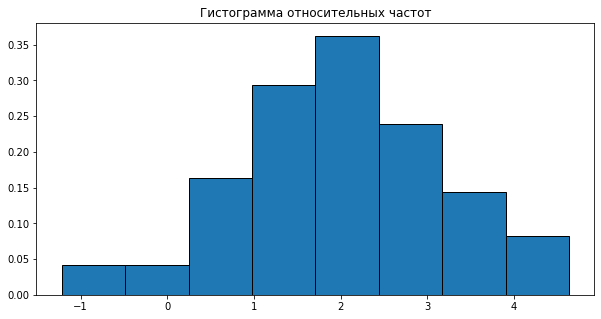

In [ ]:
histogram(intervals_norm,norm,N)

Эмпирическая функция распределения

In [ ]:
Fn = ECDF(norm)

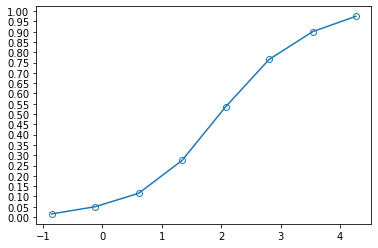

In [ ]:
plt.plot(asintervals_norm, Fn(asintervals_norm), marker="o", markerfacecolor='none')
plt.yticks(np.arange(0,1.05, 0.05))
plt.show()

In [ ]:
practic = find6_8(norm, intervals_norm, asintervals_norm, w_norm, N)
practic

array([ 2.00472,  1.31917,  1.16781,  1.26635,  1.83644, -0.12246,
       -0.13365])

In [ ]:
theory = find_norm(a_norm,sgm_norm)
theory

array([2.  , 1.44, 1.2 , 2.  , 2.  , 0.  , 0.  ])

In [ ]:
abs = division(practic, theory)
abs

array([0.00472, 0.12083, 0.03219, 0.73365, 0.16356, 0.12246, 0.13365])

In [ ]:
rel = comparison(abs, theory)
rel

<ipython-input-13-3eee365a1ee5>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)


array([0.00236, 0.08391, 0.02683, 0.36682, 0.08178,     inf,     inf])

# Задание 7

In [ ]:
# A common parameterization for expon is in terms of the rate parameter lambda,
# such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.
# lmbd = 2+(-1)**V * 0.001*V
# exp = expon.rvs(size=200, scale=1/(lmbd))

In [ ]:
exp

array([6.79575e-01, 3.49725e-01, 9.19590e-01, 4.21735e-01, 1.22308e+00,
       2.60734e-01, 5.38418e-01, 1.78594e-01, 2.45629e-01, 1.37191e-01,
       2.82116e+00, 9.53177e-01, 4.90626e-01, 6.60111e-01, 1.88075e-01,
       6.14269e-01, 4.21271e-01, 1.74184e-01, 1.02727e-01, 1.46863e-01,
       3.99041e-02, 2.46426e-01, 2.04134e-02, 4.06315e-01, 1.47500e+00,
       2.09907e-01, 2.77069e-02, 3.09844e-01, 2.91711e-01, 6.46090e-01,
       1.69901e-02, 8.96957e-01, 8.57023e-02, 1.04350e+00, 4.83183e-01,
       5.70690e-02, 1.24230e-01, 6.95725e-01, 3.16292e-01, 2.45280e-01,
       1.46120e-01, 4.68781e-01, 1.52096e-01, 3.28582e-02, 1.87408e-02,
       1.96413e-01, 3.90215e-01, 8.09516e-01, 4.99482e-01, 3.16481e-01,
       1.58067e-01, 1.54015e-01, 1.23539e+00, 1.90699e-01, 7.07989e-01,
       7.12650e-01, 5.87650e-01, 6.84606e-01, 4.24440e-01, 8.70771e-01,
       4.62193e-01, 6.15805e-01, 8.01366e-01, 2.45785e-01, 3.80296e-01,
       6.98959e-01, 5.06499e-03, 1.32556e+00, 4.55854e-01, 2.431

In [ ]:
exp.sort()
exp

array([8.72805e-04, 2.47450e-03, 5.06499e-03, 8.91471e-03, 1.00817e-02,
       1.19903e-02, 1.34265e-02, 1.69901e-02, 1.87408e-02, 2.04134e-02,
       2.70567e-02, 2.77069e-02, 2.84582e-02, 2.91328e-02, 3.05717e-02,
       3.11065e-02, 3.28582e-02, 3.29307e-02, 3.45899e-02, 3.99041e-02,
       4.02270e-02, 4.32692e-02, 4.39327e-02, 5.64997e-02, 5.70690e-02,
       6.20390e-02, 6.41646e-02, 6.52702e-02, 7.31363e-02, 7.42159e-02,
       7.50786e-02, 7.58735e-02, 7.68619e-02, 8.57023e-02, 9.20759e-02,
       9.38821e-02, 9.86346e-02, 1.01749e-01, 1.02727e-01, 1.03494e-01,
       1.04410e-01, 1.10966e-01, 1.15647e-01, 1.16250e-01, 1.20444e-01,
       1.22086e-01, 1.24230e-01, 1.26588e-01, 1.37191e-01, 1.39973e-01,
       1.40425e-01, 1.43103e-01, 1.46120e-01, 1.46490e-01, 1.46863e-01,
       1.52096e-01, 1.52690e-01, 1.54015e-01, 1.56758e-01, 1.58067e-01,
       1.66186e-01, 1.67639e-01, 1.73097e-01, 1.74184e-01, 1.74210e-01,
       1.78594e-01, 1.79907e-01, 1.80307e-01, 1.87220e-01, 1.880

In [ ]:
intervals_exp = detIntervals(exp, 0, exp[-1]) # Интервальный ряд
asintervals_exp = associativeSeries(intervals_exp)
print(intervals_exp, '\n', asintervals_exp) # Ассоциативный ряд
n_exp, w_exp = detCountIntervals(exp, intervals_exp) # ni wi
print(n_exp, sum(n_exp))
print(w_exp, sum(w_exp))

N = len(n_exp)

[[0, 0.38088362127319153], [0.38088362127319153, 0.7617672425463831], [0.7617672425463831, 1.1426508638195747], [1.1426508638195747, 1.5235344850927661], [1.5235344850927661, 1.9044181063659575], [1.9044181063659575, 2.285301727639149], [2.285301727639149, 2.6661853489123404], [2.6661853489123404, 3.047068970185532]] 
 [0.19044181063659577, 0.5713254319097874, 0.9522090531829789, 1.3330926744561704, 1.7139762957293618, 2.0948599170025535, 2.4757435382757444, 2.8566271595489363]
[107, 53, 27, 6, 3, 1, 1, 2] 200
[0.535, 0.265, 0.135, 0.03, 0.015, 0.005, 0.005, 0.01] 1.00000


In [ ]:
F_exp = Fexp(intervals_exp, lmbd)

In [ ]:
print(F_exp, sum(F_exp))

[0.5402178954099548, 0.24838252088879395, 0.11420183819763054, 0.05250796151455838, 0.024142221052896738, 0.011100161205178967, 0.005103655480205962, 0.002346569457791615] 0.99800


In [ ]:
division(F_exp, w_exp)

array([0.00522, 0.01662, 0.0208 , 0.02251, 0.00914, 0.0061 , 0.0001 ,
       0.00765])

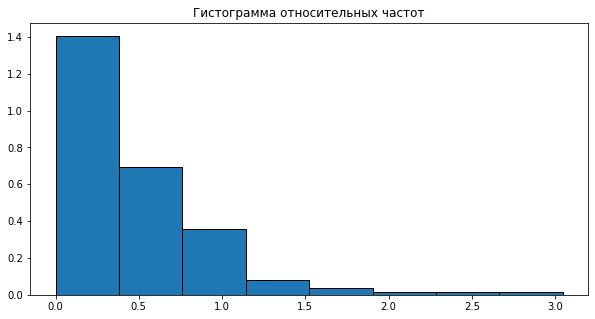

In [ ]:
histogram(intervals_exp,exp,N)

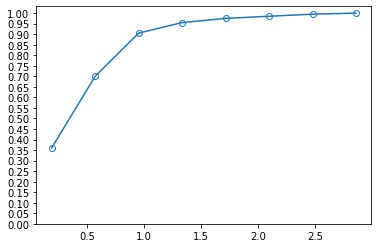

In [ ]:
Fn = ECDF(exp)
plt.plot(asintervals_exp, Fn(asintervals_exp), marker="o", markerfacecolor='none')
plt.yticks(np.arange(0,1.05, 0.05))
plt.show()

In [ ]:
practic = find6_8(exp, intervals_exp, asintervals_exp, w_exp, N)
practic

array([ 0.46296,  0.21888,  0.48059, -0.05031,  0.25153,  2.08353,
        4.34047])

In [ ]:
theory = find_exp(lmbd)
theory

array([0.4902 , 0.24029, 0.4902 , 0.     , 0.14756, 2.     , 6.     ])

In [ ]:
abs = division(practic, theory)
abs

array([0.02723, 0.02141, 0.0096 , 0.05031, 0.10396, 0.08353, 1.65953])

In [ ]:
rel = comparison(abs, theory)
rel

<ipython-input-13-3eee365a1ee5>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)


array([0.05555, 0.0891 , 0.01958,     inf, 0.70451, 0.04176, 0.27659])

# Задание 8

In [ ]:
# a = (-1.0)**V*0.002*V
# ab = a+ 6
# uni = uniform.rvs(size=200, loc=a, scale=6)

In [ ]:
uni

array([2.02029, 3.63627, 5.2347 , 3.92482, 3.14689, 3.37498, 2.79071,
       0.63385, 5.99781, 2.93822, 4.13714, 0.29724, 3.10507, 4.93977,
       5.50795, 1.99584, 5.30898, 1.27289, 2.11298, 4.75179, 0.76083,
       2.50418, 1.15602, 1.21335, 3.16599, 5.89443, 1.34389, 3.66639,
       3.27487, 3.54719, 5.69109, 3.16334, 1.93389, 1.8453 , 3.79542,
       4.59999, 5.57233, 0.85288, 3.45765, 1.89889, 5.7413 , 5.30134,
       5.72287, 5.78302, 4.06465, 2.95693, 1.58371, 3.21427, 2.29343,
       3.59037, 5.22011, 1.18373, 0.09044, 3.30368, 0.53304, 5.35844,
       3.72799, 1.734  , 4.8139 , 4.5004 , 4.44754, 2.39862, 6.02337,
       0.18572, 1.35482, 0.95359, 5.17354, 3.65471, 0.09408, 1.06602,
       3.03234, 1.6004 , 4.59794, 2.83277, 3.55159, 2.99645, 1.61122,
       3.27322, 4.36392, 2.21998, 1.12957, 5.36062, 0.10901, 0.89364,
       0.32469, 5.24418, 2.72921, 3.08443, 2.06951, 1.92147, 4.02781,
       2.34657, 5.92155, 1.04728, 3.20735, 0.64604, 1.53561, 3.57225,
       4.21228, 3.71

In [ ]:
uni.sort()
uni

array([0.09044, 0.09408, 0.10901, 0.11445, 0.18572, 0.22275, 0.29724,
       0.31152, 0.32469, 0.32823, 0.38997, 0.41128, 0.45884, 0.4789 ,
       0.48312, 0.50674, 0.53304, 0.57184, 0.63385, 0.64604, 0.69879,
       0.72298, 0.73785, 0.76083, 0.85288, 0.86531, 0.87263, 0.89364,
       0.95359, 1.04728, 1.06602, 1.12957, 1.14644, 1.15602, 1.18373,
       1.18481, 1.21335, 1.22863, 1.26147, 1.27289, 1.2941 , 1.33389,
       1.34389, 1.34836, 1.35482, 1.35914, 1.49337, 1.52334, 1.53561,
       1.58371, 1.6004 , 1.61122, 1.64911, 1.72649, 1.734  , 1.75929,
       1.8453 , 1.89889, 1.90652, 1.92147, 1.93389, 1.95206, 1.9756 ,
       1.99584, 2.00673, 2.01334, 2.02029, 2.06951, 2.09504, 2.11298,
       2.15337, 2.17945, 2.21998, 2.25324, 2.29343, 2.33384, 2.34657,
       2.39862, 2.44016, 2.4789 , 2.50418, 2.53694, 2.54026, 2.54728,
       2.60642, 2.62035, 2.64776, 2.72921, 2.76982, 2.79071, 2.83277,
       2.86332, 2.90537, 2.93822, 2.95693, 2.99645, 3.00437, 3.02805,
       3.03234, 3.04

In [ ]:
intervals_uni = detIntervals(uni, a_uni, a_uni+6) # Интервальный ряд
asintervals_uni = associativeSeries(intervals_uni)
print(intervals_uni, '\n', asintervals_uni) # Ассоциативный ряд
n_uni, w_uni = detCountIntervals(uni, intervals_uni) # ni wi
print(n_uni, sum(n_uni))
print(w_uni, sum(w_uni))

N = len(n_uni)

[[0.08, 0.83], [0.83, 1.58], [1.58, 2.33], [2.33, 3.08], [3.08, 3.83], [3.83, 4.58], [4.58, 5.33], [5.33, 6.08]] 
 [0.45499999999999996, 1.205, 1.955, 2.705, 3.455, 4.205, 4.955, 5.705]
[24, 25, 26, 25, 32, 18, 26, 24] 200
[0.12, 0.125, 0.13, 0.125, 0.16, 0.09, 0.13, 0.12] 1.00000


In [ ]:
F_uni = Funi(intervals_uni, 6)

In [ ]:
print(F_uni, sum(F_uni))

[0.125, 0.12500000000000003, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 1.00000


In [ ]:
division(F_uni, w_uni)

array([0.005, 0.   , 0.005, 0.   , 0.035, 0.035, 0.005, 0.005])

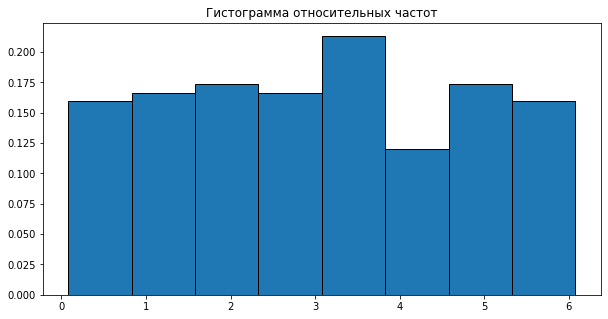

In [ ]:
histogram(intervals_uni,uni,N)

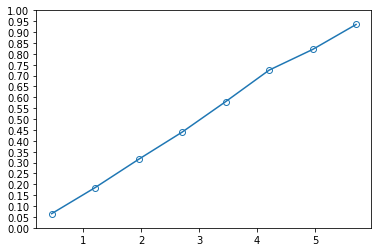

In [ ]:
Fn = ECDF(uni)
plt.plot(asintervals_uni, Fn(asintervals_uni), marker="o", markerfacecolor='none')
plt.yticks(np.arange(0,1.05, 0.05))
plt.show()

In [ ]:
practic = find6_8(uni, intervals_uni, asintervals_uni, w_uni, N)
practic

array([ 3.05239,  2.90266,  1.71742,  2.33   ,  3.455  ,  0.03385,
       -2.32329])

In [ ]:
theory = find_uni(a_uni, a_uni+6)
theory

array([ 3.08   ,  3.     ,  1.73205,  3.08   ,  3.08   ,  0.     ,
       -1.2    ])

In [ ]:
abs = division(practic, theory)
abs

array([0.02761, 0.09734, 0.01463, 0.75   , 0.375  , 0.03385, 1.12329])

In [ ]:
rel = comparison(abs, theory)
rel

<ipython-input-13-3eee365a1ee5>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.round([np.absolute(i / j) for i, j in zip( arr_1, arr_2)],5)


array([0.00896, 0.03245, 0.00845, 0.24351, 0.12175,     inf, 0.93608])